In [16]:
df_vector <- list()

In [17]:
for (hr in 0:8){
    filename <- sprintf("./counts/exp1_%shr_K4me3_HJWMVBGXX.dupsRemoved.merged.sorted.counts.bed", hr)
    df <- read.csv(filename, sep="\t", col.names=c("chr","start","end","readcount"))
    df_vector[[hr+1]] <- subset(df, select=c("start","readcount"))
}

In [38]:
zscore <- function(data){
    M <- matrix(data$ratio)
    m <- mean(M, na.rm=TRUE)
    s <- sd(M, na.rm=TRUE)
    (data$ratio - m)/s
}

In [39]:
i <- 0
background <- df_vector[[1]]
for (i in 2:8){
#     df_vector[[i]]$zscore <- df_vector[[i]]$readcount
    m <- merge(x=background, y=df_vector[[i]], by="start", all.x=TRUE)
    m$ratio <- m$readcount.y/background$readcount
    m$zscore <- zscore(m)
    df_vector[[i]] <- m
}

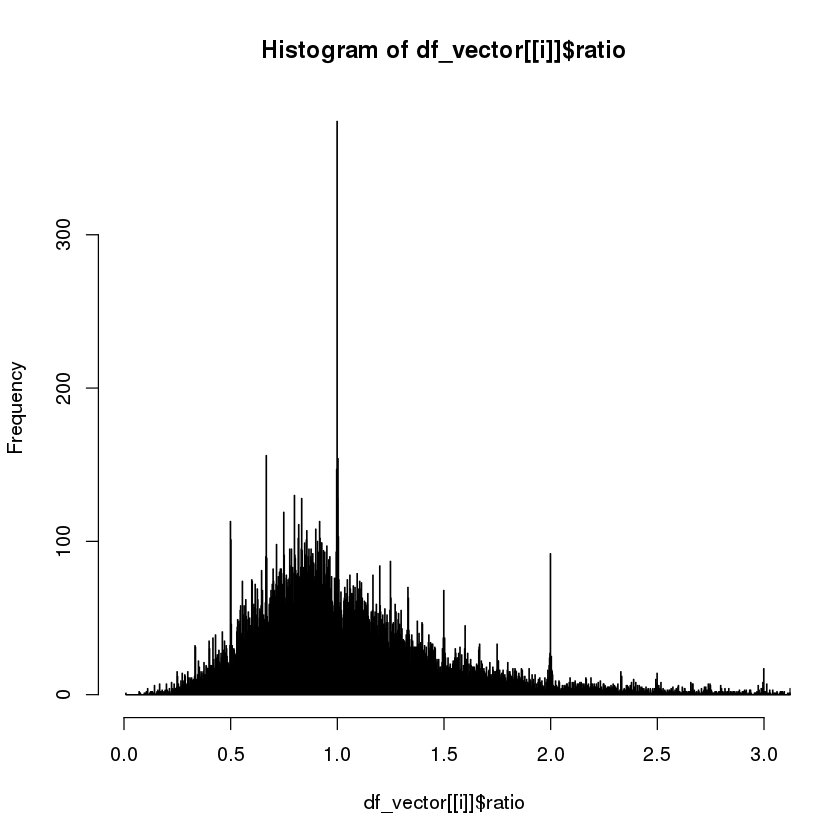

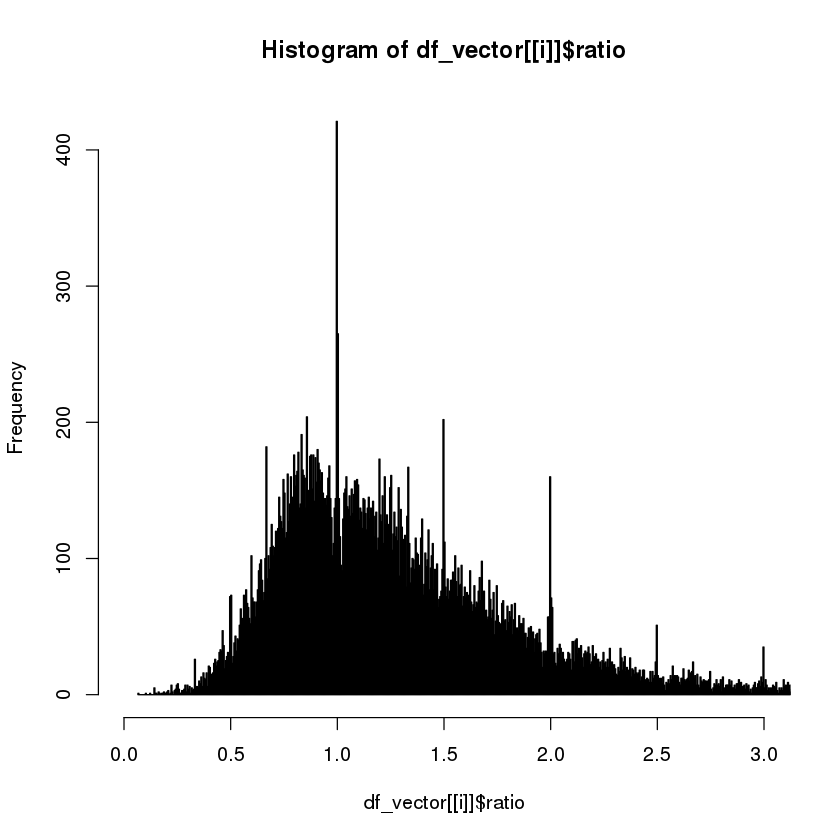

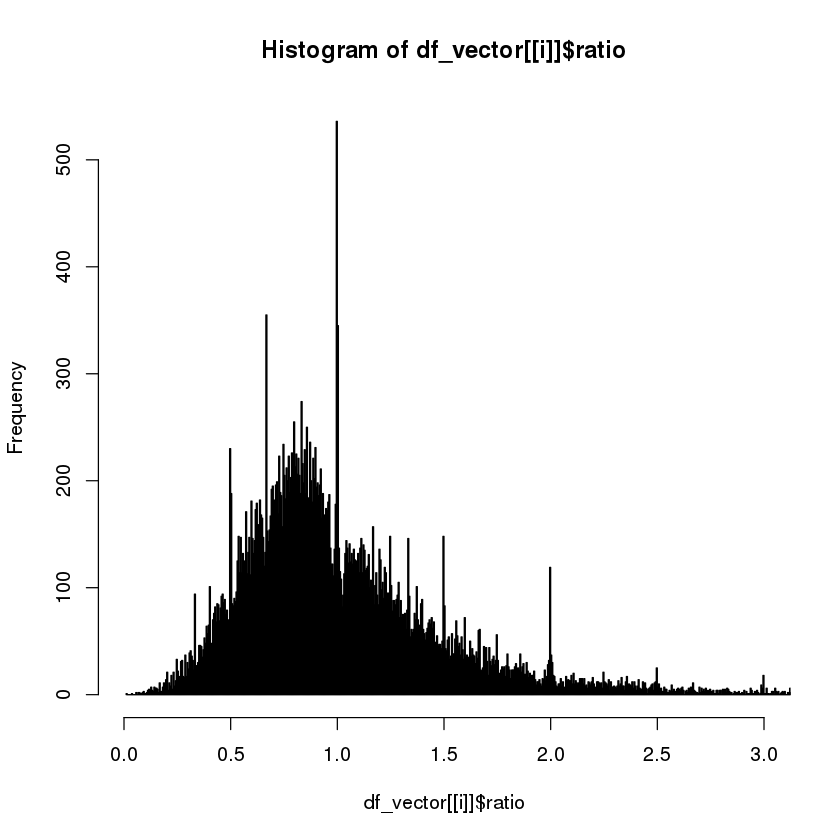

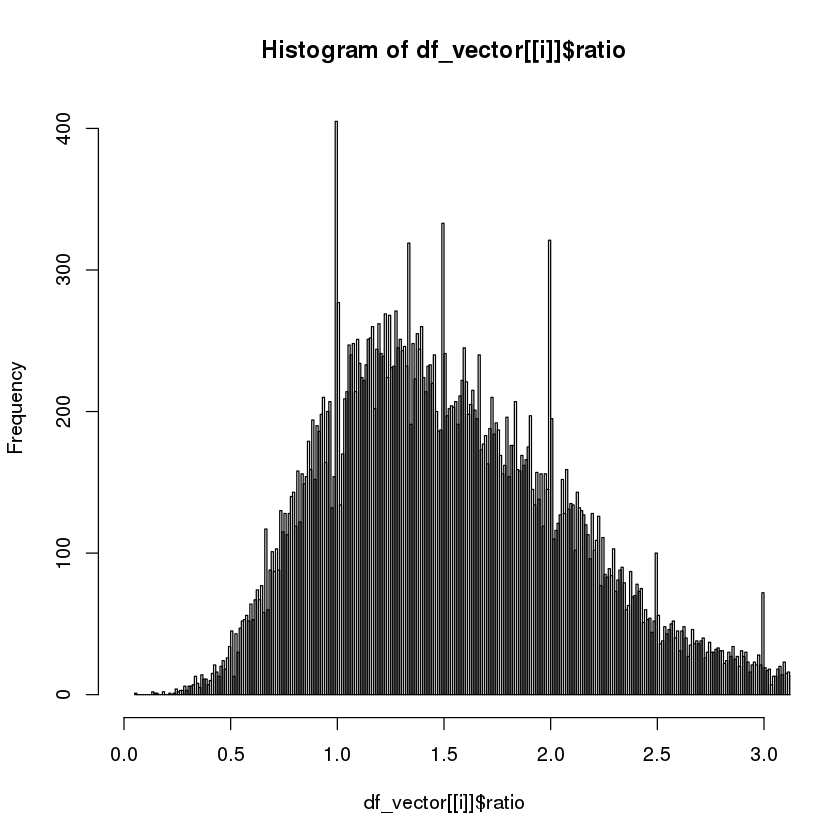

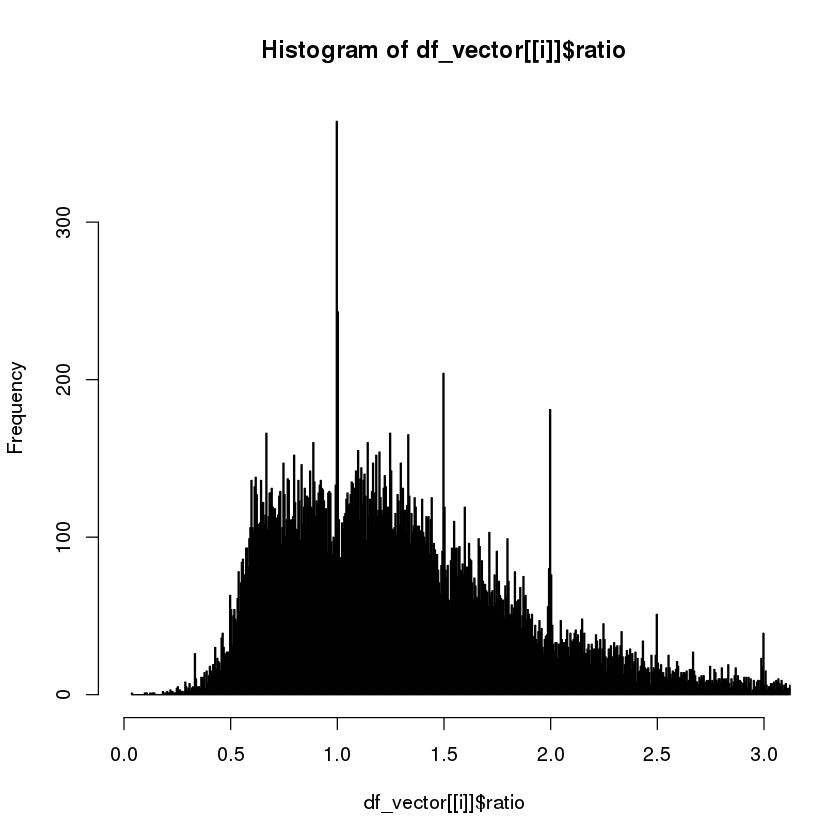

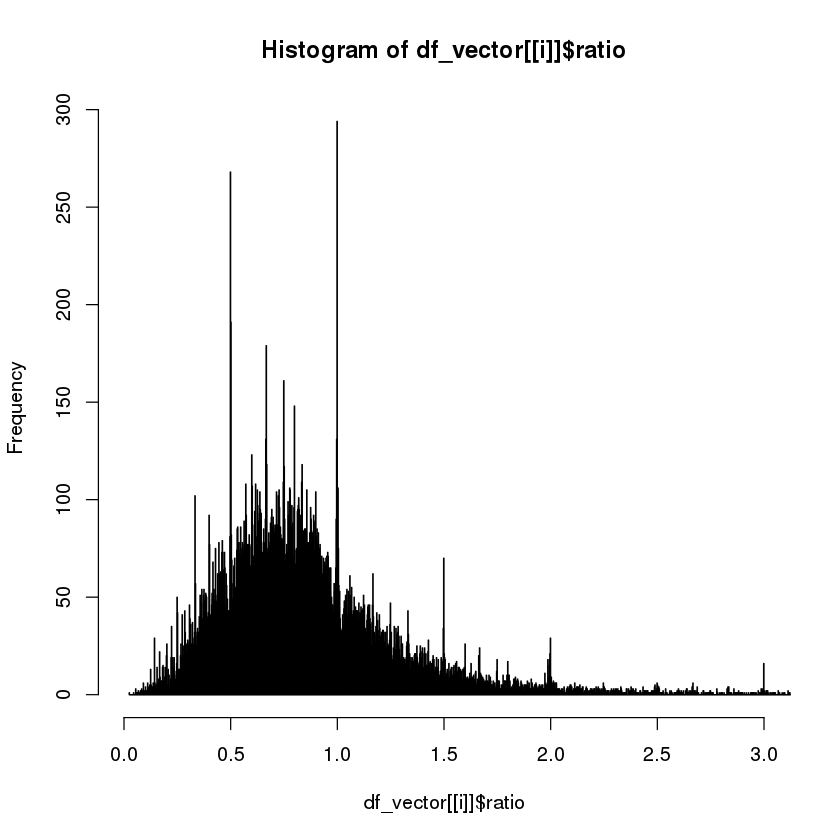

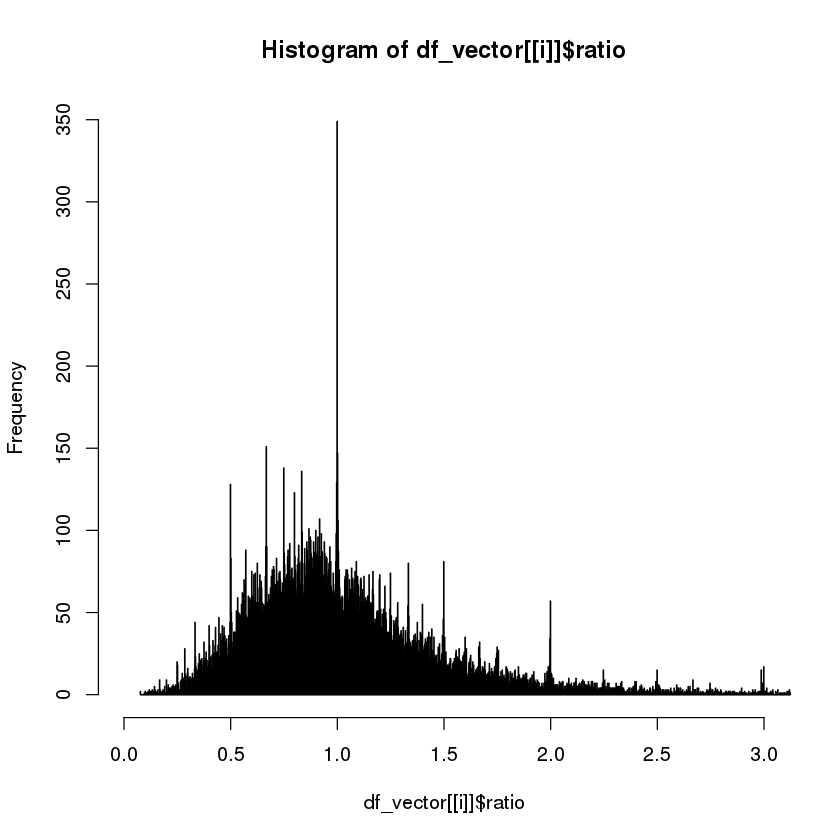

In [53]:
for (i in 2:8){
    hist(df_vector[[i]]$ratio,xlim=range(0,3), breaks=5000)
}

In [14]:
length(df_vector[[2]]$readcount)

[1] 35674

ERROR: Error in df$sprintf("ratio_%s", "aa") <- 1: target of assignment expands to non-language object


[1] 3095.687